# Laboratorium 3.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
from google.colab.patches import cv2_imshow

## a) Proszę wczytać przykładowy obraz i skonwertować go do skali szarości.

In [3]:
image = cv2.imread("/content/drive/MyDrive/AiPO/lab3_1.jpg")

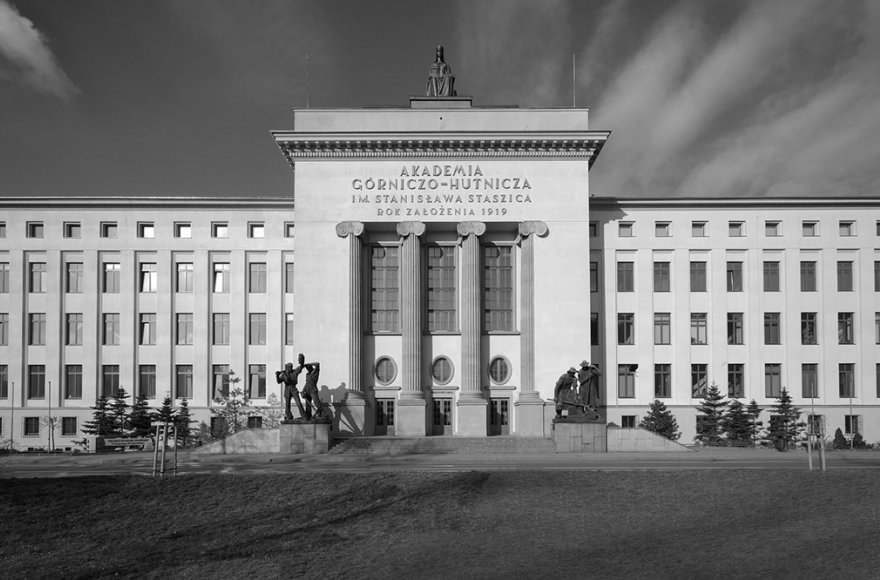

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

## b) Proszę sprawdzić i porównać wynik progowania ze statycznym ustalonym globalnie progiem zrealizowanego z użyciem każdego z dostępnych w OpenCV trybu progowania (cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC, cv2.THRESH_TOZERO i cv2.THRESH_TOZERO_INV)

THRESH_BINARY


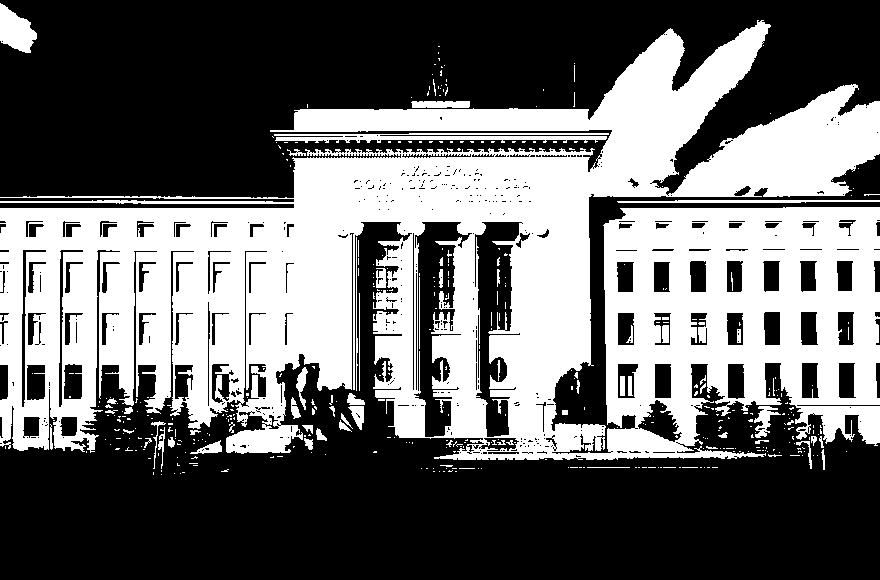

THRESH_BINARY_INV


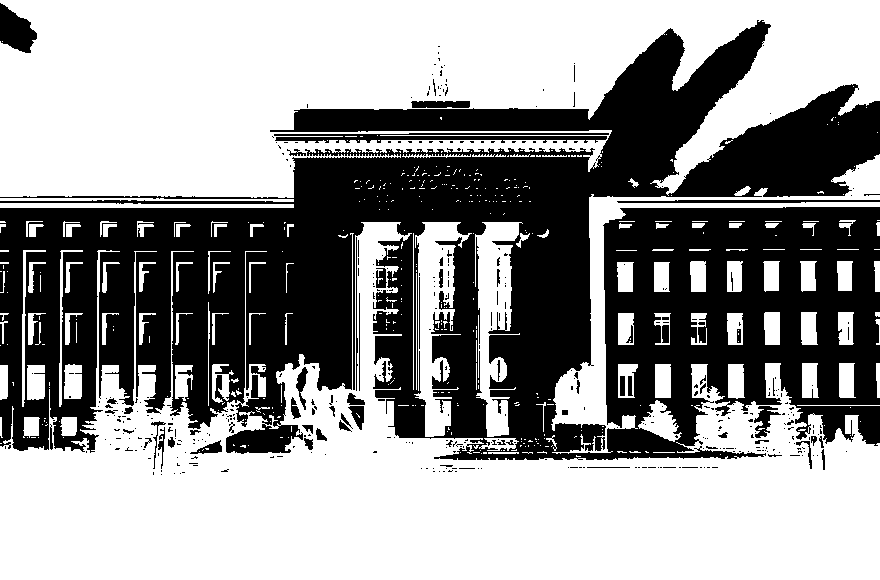

THRESH_TRUNC


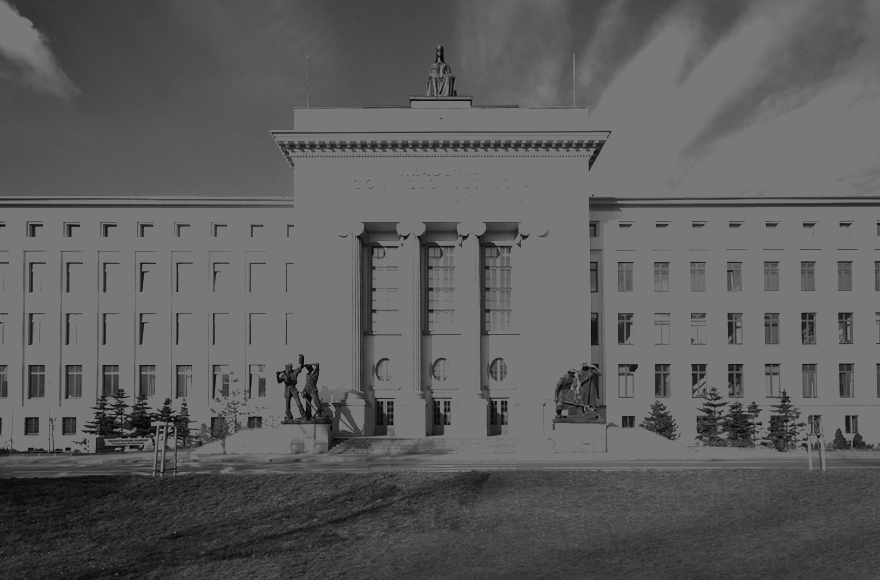

THRESH_TOZERO


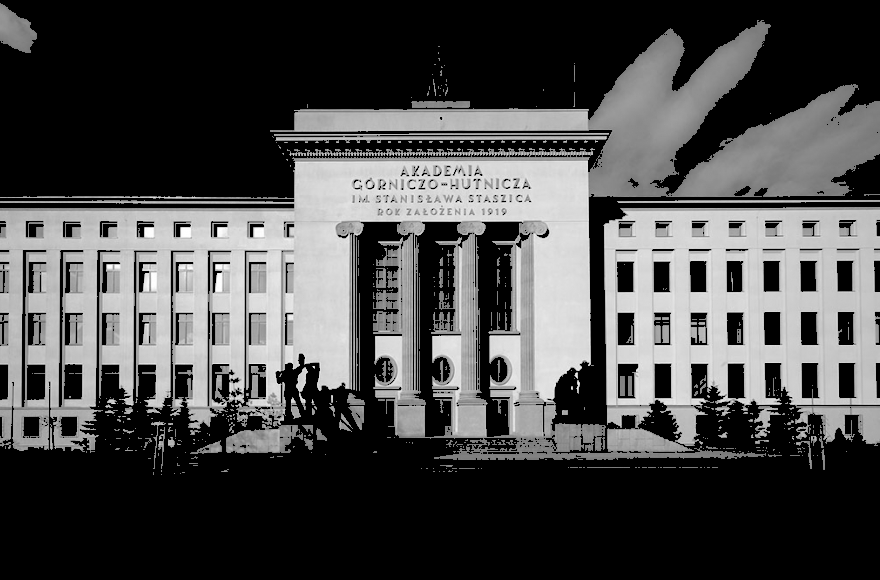

THRESH_TOZERO_INV


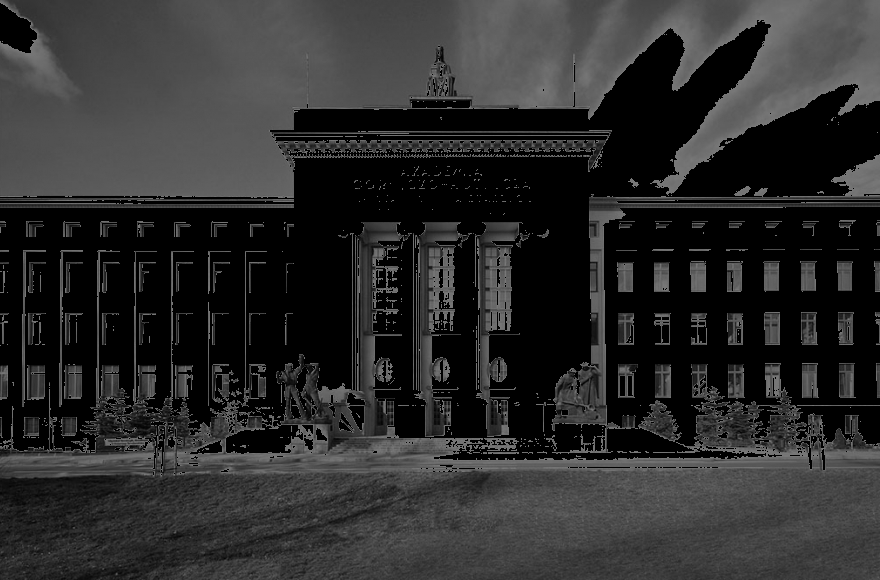

In [5]:
ret, thresh1 = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(gray, 120, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(gray, 120, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(gray, 120, 255, cv2.THRESH_TOZERO_INV)

print("THRESH_BINARY")
cv2_imshow(thresh1)
print("THRESH_BINARY_INV")
cv2_imshow(thresh2)
print("THRESH_TRUNC")
cv2_imshow(thresh3)
print("THRESH_TOZERO")
cv2_imshow(thresh4)
print("THRESH_TOZERO_INV")
cv2_imshow(thresh5)

## c) Proszę zastosować metody adaptacyjnego doboru progu. Jaki wpływ na wynik ma rozmiar sąsiedztwa? Która z metod daje lepsze rezultaty?

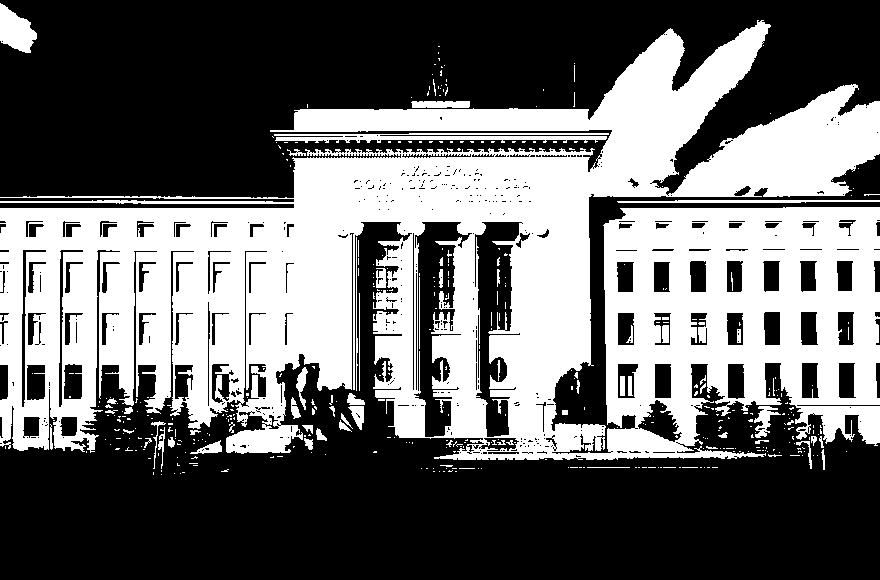

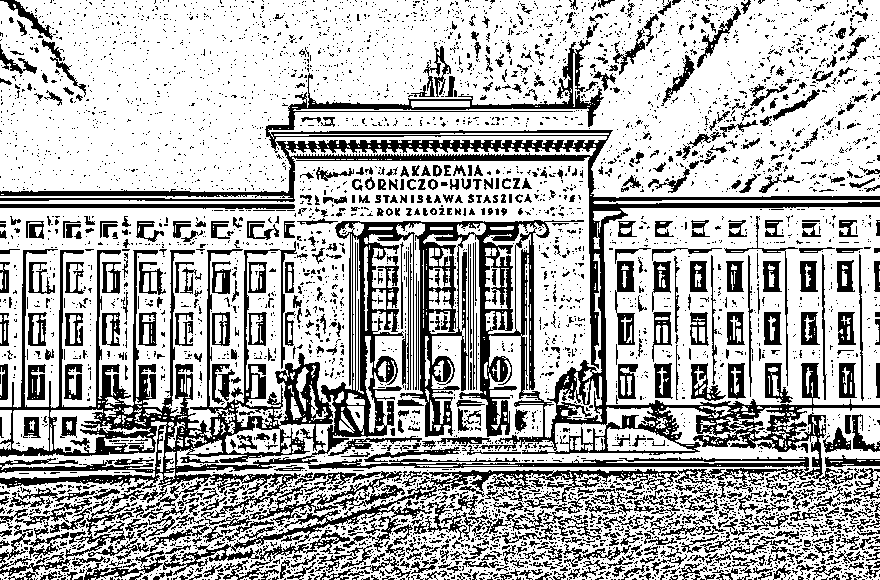

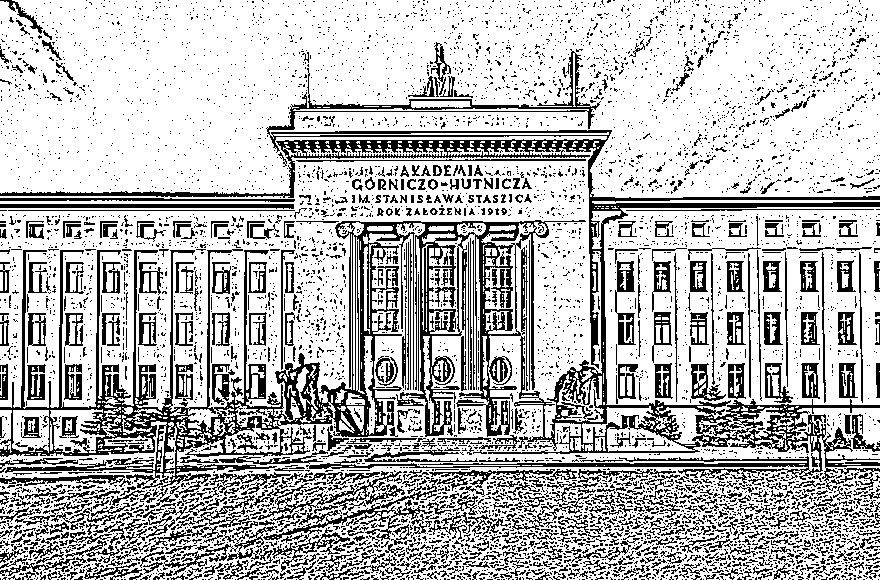

In [6]:
ret, th1 = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
cv2_imshow(th1)
cv2_imshow(th2)
cv2_imshow(th3)

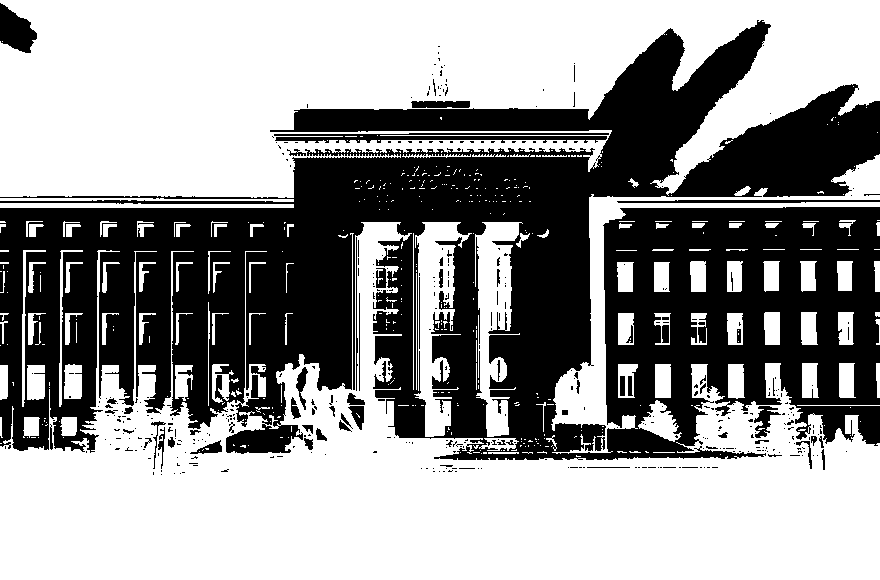

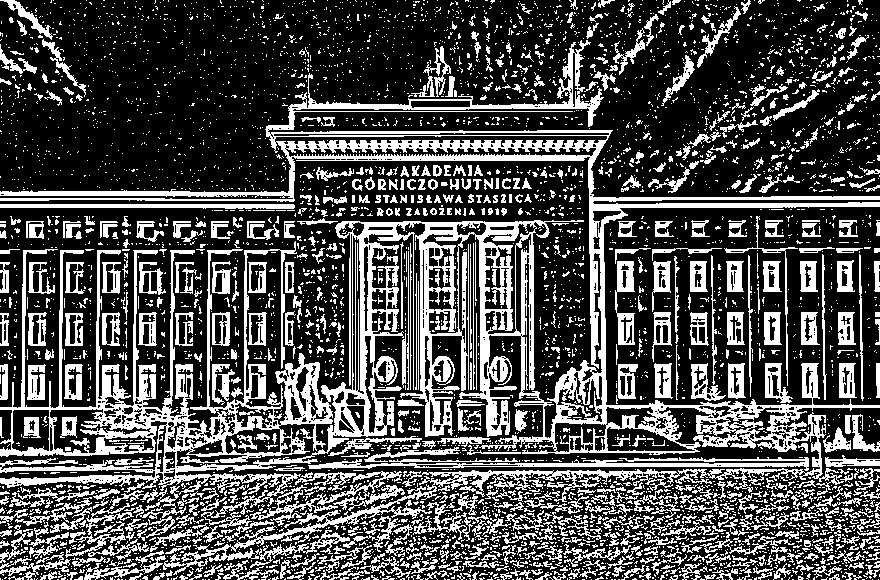

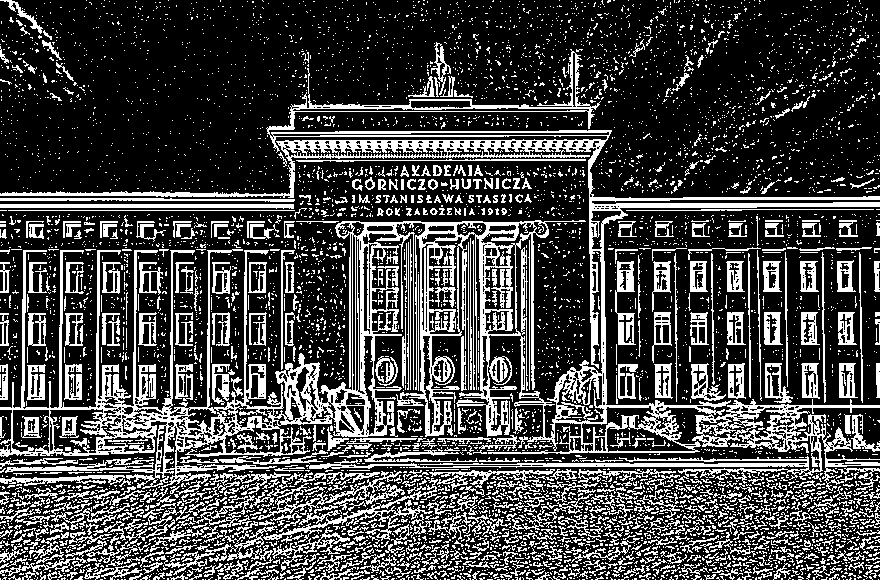

In [7]:
ret, th1 = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
th2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,11,2)
th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,2)
cv2_imshow(th1)
cv2_imshow(th2)
cv2_imshow(th3)

Rozmiar sąsiedztwa może wpłynąć na dokładność progowania. Jeśli zostanie wybrane zbyt duże sąsiedztwo (bądź zbyt małe) otrzymany obraz może być w mniejszym stopniu podobny do oryginału.

Dla metod adaptacyjnych, lepszy wynik zdaje się dawać metoda Gaussa, ponieważ zostawia mniej plam w tle o mniejszych rozmiarach. Napisy również wydają się bardziej wyraźne.

## d) Proszę zastosować metodę Otsu, wykreślić histogram obrazu i zlokalizować na nim uzyskaną wartość progu.

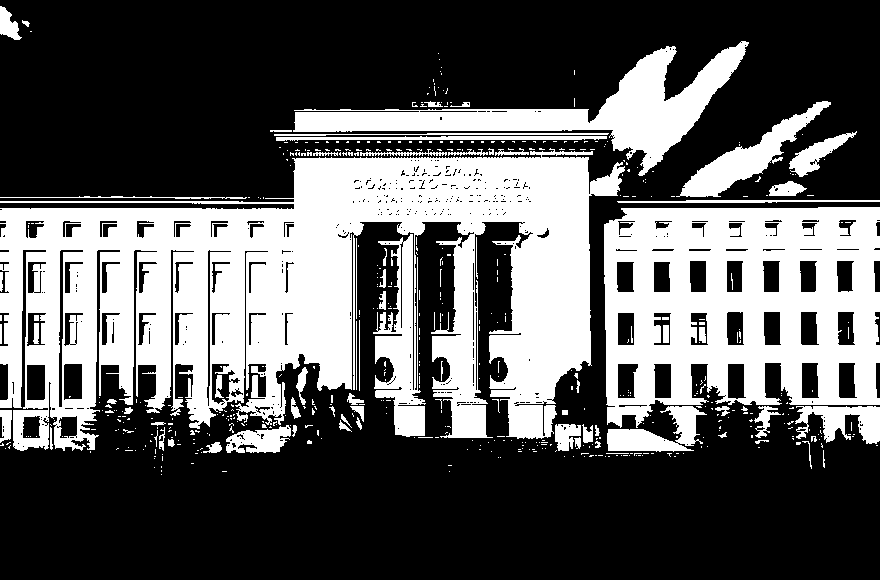

In [8]:
ret, thresh1 = cv2.threshold(gray, 120, 255, cv2.THRESH_OTSU) 
cv2_imshow(thresh1)

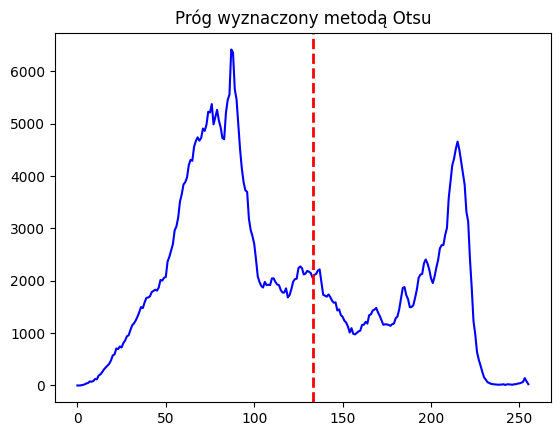

133.0


In [9]:
import numpy as np
from matplotlib import pyplot as plt
hist = cv2.calcHist([gray],[0],None,[256],[0,256])


plt.plot(hist, color='b')
plt.axvline(x=ret, color='r', linestyle='dashed', linewidth=2)
plt.title('Próg wyznaczony metodą Otsu')
plt.show()
print(ret)

## e) Proszę wczytać drugi z obrazów i dokonać jego segmentacji z użyciem algorytmu k średnich na 2, 4, 8 klastrów. Proszę zweryfikować wizualnie wynik klasteryzacji (kolor każdego piksela to kolor środka klastra do którego go przypisaliśmy) i sprawdzić czy kolory odpowiadają jakimś cechom zdjęcia które analizujemy. 

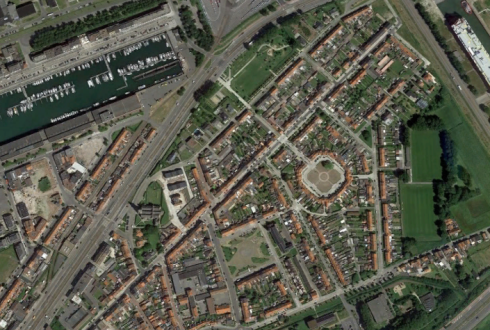

In [10]:
import numpy as np
image2 = cv2.imread("/content/drive/MyDrive/AiPO/lab3_2.png")
cv2_imshow(image2)

pixels = image2.reshape((-1, 3))
pixels = np.float32(pixels)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

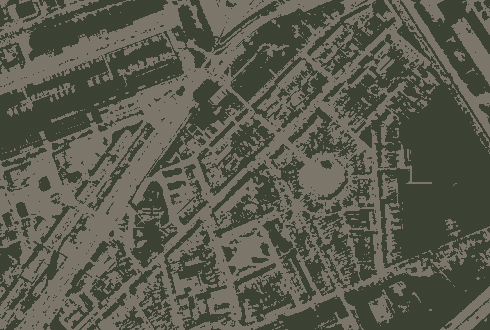

In [11]:
_, labels, (centers) = cv2.kmeans(pixels, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)

labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image2.shape)
cv2_imshow(segmented_image)

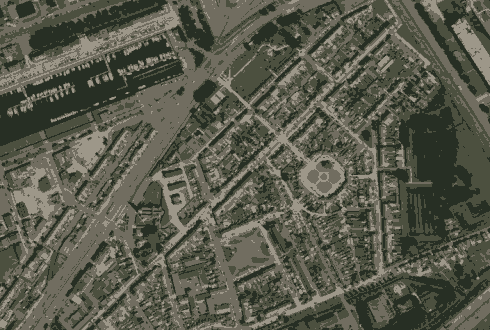

In [12]:
_, labels, (centers) = cv2.kmeans(pixels, 4, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)

labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image2.shape)
cv2_imshow(segmented_image)

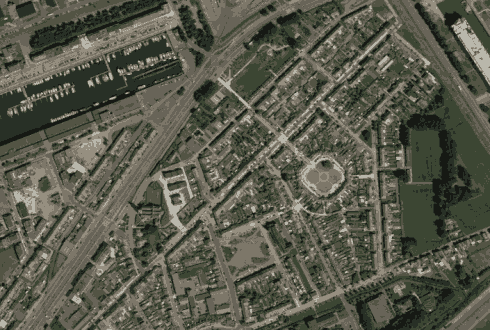

In [13]:
_, labels, (centers) = cv2.kmeans(pixels, 8, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)

labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image2.shape)
cv2_imshow(segmented_image)

Podzbiory w klasteryzacji wydają się być wyodrębnione prawidłowo. Zwiększanie ilości klastrów powoduje wzrost podobieństwa do oryginału, zatem klasteryzacja wydaje się zachodzić poprawnie. Kolory są podobne do początkowych kolorów z oryginalnego zdjęcia. Dodatkowo, kształty obiektów zostały zachowane.

## f) Proszę samodzielnie zaimplementować metodę Otsu. Czy otrzymany próg różni się od bibliotecznej implementacji? Jeśli tak to dlaczego?

In [14]:
# Wyznaczenie histogramu dla obrazka
hist, bin_edges = np.histogram(gray, bins=256)
 
# obliczenie wartości średniej dla każdej pary sąsiadujących ze sobą kolumn
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.
 
# Obliczenie prawdopodobieństwa
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]
 
# obliczenie średnich
mean1 = np.cumsum(hist * bin_mids) / weight1
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
 
inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
index_of_max_val = np.argmax(inter_class_variance)
 
threshold = bin_mids[:-1][index_of_max_val]
print("Wartość wyznaczona przez implementację algorytmu Otsu:", threshold)

Wartość wyznaczona przez implementację algorytmu Otsu: 132.947265625


Otrzymany próg róźni się nieznacznie od funkcji bibliotecznej. Prawdopodobnie jest to związane z tym, że funkcja biblioteczna zaokrągla na koniec otrzymany wynik.